In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
/#read the csv file into data frame
df = pd.read_csv('weatherAUS.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head(10)

The Dataset consists of:  145460  rows and  23  columuns


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [ ]:
#describe the data
df.describe()

In [ ]:
#checking the data types of each columns
df.dtypes

In [ ]:
#total missing values ineach column of the data
missing_values = df.isnull().sum()
missing_values

In [ ]:
# Check the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100
missing_percentage

In [ ]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

In [3]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [4]:
## split the Date column in Year Month Day
df_weather = df
df_weather[['Year', 'Month', 'Day']] = df['Date'].str.rsplit('-',n=0,expand=True)
col = df_weather.pop('Year')
col1 = df_weather.pop('Month')
col2 = df_weather.pop('Day')
df_weather.insert(0, col.name, col)
df_weather.insert(1, col1.name, col1)
df_weather.insert(2, col2.name, col2)
df_weather.drop('Date', axis=1, inplace = True)
df_weather.head()

,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12,01,Albury,13.4,22.9,0.6,NaN,NaN,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008,12,02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008,12,03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008,12,04,Albury,9.2,28.0,0.0,NaN,NaN,NE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008,12,05,Albury,17.5,32.3,1.0,NaN,NaN,W,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


/var/folders/kz/36nj487d0sgbg74v1kmzvdmc0000gn/T/ipykernel_16396/2369114155.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4, i + 1)


ValueError: num must be an integer with 1 <= num <= 12, not 13

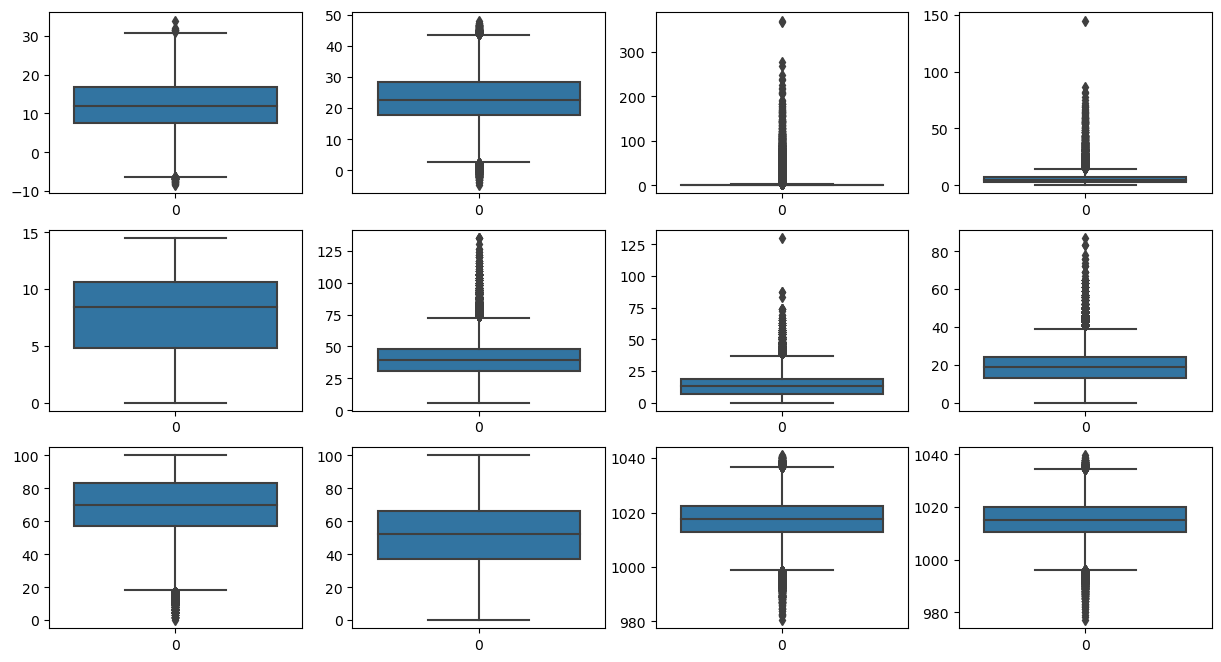

In [5]:
##https://www.geeksforgeeks.org/rainfall-prediction-using-machine-learning-python/
plt.subplots(figsize=(15,8))
 
for i, col in enumerate(numerical_features):
  plt.subplot(3,4, i + 1)
  sns.boxplot(df_weather[col])
plt.tight_layout()
plt.show()

In [6]:
## https://www.analyticsvidhya.com/blog/2021/06/predictive-modelling-rain-prediction-in-australia-with-python/
## get rid of outliers
## 'Rainfall','Evaporation','Sunshine' are not included
outliers = ['MinTemp', 'MaxTemp','Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for o in outliers:
    q1 = df_weather[o].quantile(0.25)
    q3 = df_weather[o].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df_weather.loc[df_weather[o]<lower_limit,o] = lower_limit
    df_weather.loc[df_weather[o]>upper_limit,o] = upper_limit
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.000000,130432.000000,89572.000000,86102.000000,143693.000000,141851.000000
mean,12.194186,23.224781,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.933567,51.539116,1017.670297,1015.269781,4.447461,4.509930,16.991728,21.686191
std,6.397741,7.100632,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,18.876608,20.795902,7.025447,6.976954,2.887159,2.720357,6.481325,6.909048
min,-6.350000,2.450000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,30.850000,43.650000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1036.650000,1034.400000,9.000000,9.000000,35.550000,41.100000


/var/folders/kz/36nj487d0sgbg74v1kmzvdmc0000gn/T/ipykernel_16396/4236492257.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() > 0.8,


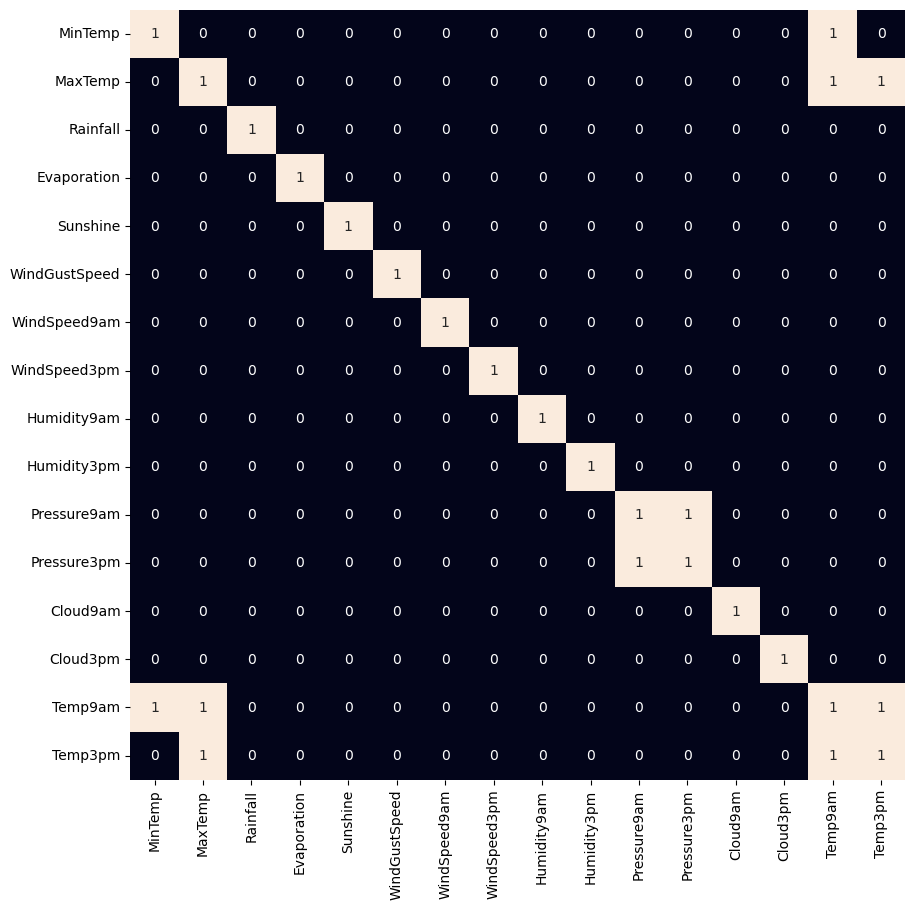

In [7]:
## to determine which cells can be removed to improved efficiency. but in this assessment, the running time is acceptable, so skip it. 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

/var/folders/kz/36nj487d0sgbg74v1kmzvdmc0000gn/T/ipykernel_16396/2806080721.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_weather.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')


<Axes: >

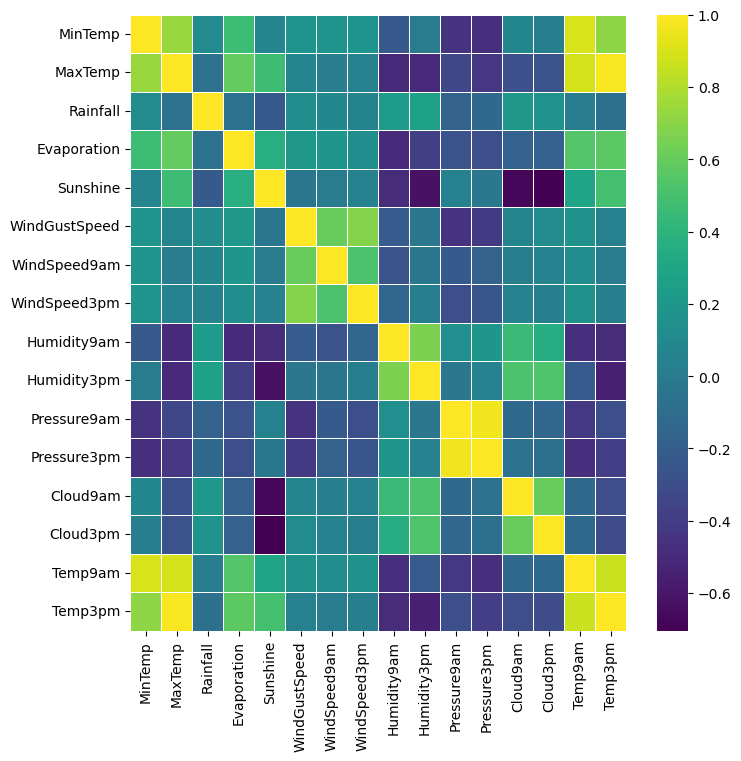

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df_weather.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')

In [ ]:
##https://www.geeksforgeeks.org/rainfall-prediction-using-machine-learning-python/
##show the data corresponding to RainToday
df_weather.groupby('RainToday').mean()
## rainfall, humidity, sunshine, evaporation, cloud and temp are related to RainToday

In [ ]:
## https://devskrol.com/2020/08/09/best-way-to-impute-nan-within-groups-mean-mode/
## replace the missing data with monthly mean
list_has_int = ['MinTemp', 'MaxTemp', 'Pressure9am', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure3pm']
for i in list_has_int:
    df_weather[i] = df_weather.groupby(['Year','Month'], sort=False)[i].apply(lambda x: x.fillna(x.mean()))

## replace the missing data related to rainfall with monthly mean
list_rain = ['Rainfall', 'Evaporation','Humidity9am' , 'Humidity3pm', 'Sunshine' , 'Cloud9am', 'Cloud3pm', 'Temp9am' , 'Temp3pm']
for r in list_rain:
    df_weather[r] = df_weather.groupby(['Year','Month','RainToday'], sort=False)[r].apply(lambda x: x.fillna(x.mean()))
    
df_weather.describe()

In [ ]:
##https://www.geeksforgeeks.org/rainfall-prediction-using-machine-learning-python/
plt.pie(df_weather['RainToday'].value_counts().values,
        labels = df_weather['RainToday'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [ ]:
##https://www.geeksforgeeks.org/rainfall-prediction-using-machine-learning-python/
df_weather['RainToday'].value_counts().plot(kind='bar')